# CE802 ML Assignment
## comparative study

### Load Data and Analysis 

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm


from sklearn import metrics

In [2]:
## Load Data ##
DataFrame = pd.read_csv("CE802_Ass_2019_Data.csv")
DataFrame.head(n=3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,...,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,NaN,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,...,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,NaN,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,...,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False


In [3]:
## statistics of the training dataset ##
DataFrame.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,328.000000
mean,0.668000,0.506000,93.20400,-0.065980,-0.037800,0.03994,1.219340,-0.046900,38.352000,7.156000,-0.000580,-0.004480,0.936420,0.742000,0.004500,0.385840,-0.073300,-0.083320,9.294200,0.074146
std,0.471403,0.500465,70.32064,1.534023,1.041526,1.04141,1.372958,0.980714,25.331946,16.716295,1.076134,1.014567,0.702435,15.458634,0.982961,1.645632,0.979986,0.999405,5.813214,1.891396
min,0.000000,0.000000,3.00000,-4.300000,-2.870000,-2.90000,-2.330000,-3.230000,0.000000,-49.000000,-3.470000,-3.570000,0.000000,-41.000000,-3.240000,-4.080000,-3.060000,-3.190000,0.500000,-5.350000
25%,0.000000,0.000000,37.00000,-1.102500,-0.792500,-0.67000,0.297500,-0.690000,18.000000,-5.000000,-0.750000,-0.702500,0.347500,-9.250000,-0.615000,-0.802500,-0.730000,-0.742500,5.100000,-0.740000
50%,1.000000,1.000000,79.00000,-0.105000,-0.030000,0.03000,1.235000,-0.080000,35.000000,7.000000,0.010000,0.025000,0.790000,0.000000,-0.005000,0.385000,-0.120000,-0.100000,8.200000,0.170000
75%,1.000000,1.000000,135.25000,1.042500,0.640000,0.76000,2.080000,0.592500,54.000000,19.000000,0.792500,0.680000,1.335000,12.000000,0.662500,1.505000,0.560000,0.602500,11.800000,0.910000
max,1.000000,1.000000,338.00000,3.900000,3.300000,3.22000,5.690000,2.700000,140.000000,61.000000,3.900000,3.030000,4.000000,55.000000,3.260000,5.680000,2.620000,3.640000,36.800000,6.130000


In [4]:
DataFrame.boxplot()

In [5]:
## Values missing in F20 Row ##
## Data is not normalised ##

False    279
True     221
Name: Class, dtype: int64


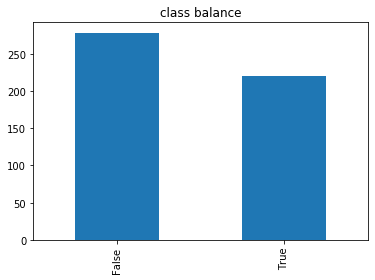

In [6]:
print(DataFrame.Class.value_counts())
DataFrame.Class.value_counts().plot(kind = 'bar', title = 'class balance')

In [7]:
## Data skewed towards False class ##

### ML Models

### PRUNED  DECISION TREE

In [8]:
## Pruned Decision Tree ##

def Dec_tree(x,y):
    
    ''' train optimised decision tree using grid search and 
    return mean accuracy using stratified K fold cross validation'''
    
    clf = DecisionTreeClassifier(random_state = 42)   
    
    path = clf.cost_complexity_pruning_path(x, y) 
    
    ccp_alphas = np.ndarray.tolist(path.ccp_alphas)                                                        
   
    max_depth = list(range(3,30,1))                  
    
    parameter_grid = {'ccp_alpha':ccp_alphas,
                      'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'max_depth': max_depth }
    
    
    grid_search = GridSearchCV(clf,
                               refit='false',
                               param_grid=parameter_grid,  
                               n_jobs = -1) 
    
    grid_search.fit(x,y) 
    
    print('Mean cross validated accuracy of the best estimator: {} \n'.format(grid_search.best_score_))
    
    best_model = grid_search.best_estimator_              
    
    return best_model

#####  No F20 Feature ## Baseline Approach ##

In [9]:
## preprocessing steps##

df = DataFrame.copy()                                     
df = df.drop(columns = ['F20'])      

data = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(data, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal.values.reshape(-1, 19))

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)

'''*********************************************************************************************'''
## building decision tree and model evaluation ##

best_model = Dec_tree(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6076305220883536 

DecisionTreeClassifier(ccp_alpha=0.01089020397884663, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42,
                       splitter='random')
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.59      0.53      0.56        80
        True       0.45      0.52      0.48        60

    accuracy                           0.52       140
   macro avg       0.52      0.52      0.52       140
weighted avg       0.53      0.52      0.52       140


Kappa Score: 0.04089979550102252 

Confusion Matrix: 

[[42 38]
 [29 31]] 



##### Mean Imputer

In [10]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.mean(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building decision tree and model evaluation ##

best_model = Dec_tree(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6508605851979345 

DecisionTreeClassifier(ccp_alpha=0.00929108485499463, class_weight=None,
                       criterion='entropy', max_depth=12, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42,
                       splitter='random')
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.48      0.53      0.50        64
        True       0.57      0.51      0.54        76

    accuracy                           0.52       140
   macro avg       0.52      0.52      0.52       140
weighted avg       0.53      0.52      0.52       140


Kappa Score: 0.0440277211577661 

Confusion Matrix: 

[[34 30]
 [37 39]] 



##### Median Imputer

In [11]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.median(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building decision tree and model evaluation ##

best_model = Dec_tree(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6603557085484796 

DecisionTreeClassifier(ccp_alpha=0.008851674641148326, class_weight=None,
                       criterion='entropy', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42,
                       splitter='random')
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.61      0.58      0.59        74
        True       0.55      0.58      0.56        66

    accuracy                           0.58       140
   macro avg       0.58      0.58      0.58       140
weighted avg       0.58      0.58      0.58       140


Kappa Score: 0.15645424836601296 

Confusion Matrix: 

[[43 31]
 [28 38]] 



#####  Iterative Imputer 

In [12]:
## preprocessing steps##

df = DataFrame.copy()          

imp = IterativeImputer(max_iter=10, random_state= 42) 
x = imp.fit_transform(df.values)  

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building decision tree and model evaluation ##

best_model = Dec_tree(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6696213425129087 

DecisionTreeClassifier(ccp_alpha=0.0109252867221733, class_weight=None,
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.75      0.72      0.73        74
        True       0.70      0.73      0.71        66

    accuracy                           0.72       140
   macro avg       0.72      0.72      0.72       140
weighted avg       0.72      0.72      0.72       140


Kappa Score: 0.4424019607843137 

Confusion Matrix: 

[[53 21]
 [18 48]] 



##### KNN imputation

In [13]:
df = DataFrame.copy()          

z = int(math.sqrt(df.F20.count()))
imputer = KNNImputer(n_neighbors = z, weights = 'distance')
x = imputer.fit_transform(df.values)

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building decision tree and model evaluation ##

best_model = Dec_tree(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6388984509466438 

DecisionTreeClassifier(ccp_alpha=0.005103668261562998, class_weight=None,
                       criterion='gini', max_depth=7, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.54      0.64      0.58        59
        True       0.70      0.59      0.64        81

    accuracy                           0.61       140
   macro avg       0.62      0.62      0.61       140
weighted avg       0.63      0.61      0.62       140


Kappa Score: 0.23029932803909592 

Confusion Matrix: 

[[38 21]
 [33 48]] 



### Naive Bayes

In [14]:
def NaiveBayes (data, target, xtest, ytest):
    
    clf = GaussianNB() 
    clf.fit(data,target)
    
    score = cross_val_score(clf,data,target,cv = 10)
    
    print('Mean cross validated Accuracy of the model: {}'.format(np.mean(score)))  
    
    yPred = clf.predict(xtest)

    print(" \n Classification report: \n")  
    print(metrics.classification_report(yPred,ytest)  + "\n") 
    print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
    print("Confusion Matrix: \n" ) 
    print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

##### No F20 Feature ## Baseline Approach

In [15]:
## preprocessing steps##

df = DataFrame.copy()                                     
df = df.drop(columns = ['F20'])      

data = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(data, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal.values.reshape(-1, 19))

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)

'''*********************************************************************************************'''
## building Naive Bayes Classifier and model evaluation ##

NaiveBayes(xtrain, ytrain, xtest, ytest)


Mean cross validated Accuracy of the model: 0.5432636469221835
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.59      0.58      0.59        72
        True       0.57      0.57      0.57        68

    accuracy                           0.58       140
   macro avg       0.58      0.58      0.58       140
weighted avg       0.58      0.58      0.58       140


Kappa Score: 0.15679869334422214 

Confusion Matrix: 

[[42 30]
 [29 39]] 



##### Mean Imputer

In [16]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.mean(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building Naive Bayes Classifier and model evaluation ##

NaiveBayes(xtrain, ytrain, xtest, ytest)



Mean cross validated Accuracy of the model: 0.5337398373983739
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.63      0.60      0.62        75
        True       0.57      0.60      0.58        65

    accuracy                           0.60       140
   macro avg       0.60      0.60      0.60       140
weighted avg       0.60      0.60      0.60       140


Kappa Score: 0.1991828396322779 

Confusion Matrix: 

[[45 30]
 [26 39]] 



##### Median Imputer

In [17]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.median(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building Naive Bayes Classifier and model evaluation ##

NaiveBayes(xtrain, ytrain, xtest, ytest)

Mean cross validated Accuracy of the model: 0.5337398373983739
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.62      0.59      0.61        74
        True       0.57      0.59      0.58        66

    accuracy                           0.59       140
   macro avg       0.59      0.59      0.59       140
weighted avg       0.59      0.59      0.59       140


Kappa Score: 0.18504901960784303 

Confusion Matrix: 

[[44 30]
 [27 39]] 



#####  Iterative Imputer 

In [18]:
## preprocessing steps##

df = DataFrame.copy()          

imp = IterativeImputer(max_iter=10, random_state= 42) 
x = imp.fit_transform(df.values)  

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building Naive Bayes Classifier and model evaluation ##

NaiveBayes(xtrain, ytrain, xtest, ytest)

Mean cross validated Accuracy of the model: 0.5622531939605111
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.69      0.64      0.66        77
        True       0.59      0.65      0.62        63

    accuracy                           0.64       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.65      0.64      0.64       140


Kappa Score: 0.28469241773962806 

Confusion Matrix: 

[[49 28]
 [22 41]] 



##### KNN imputation

In [19]:
df = DataFrame.copy()          

z = int(math.sqrt(df.F20.count()))
imputer = KNNImputer(n_neighbors = z, weights = 'distance')
x = imputer.fit_transform(df.values)

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building Naive Bayes Classifier and model evaluation ##


NaiveBayes(xtrain, ytrain, xtest, ytest)


Mean cross validated Accuracy of the model: 0.5408246225319395
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.63      0.58      0.61        77
        True       0.54      0.59      0.56        63

    accuracy                           0.59       140
   macro avg       0.59      0.59      0.58       140
weighted avg       0.59      0.59      0.59       140


Kappa Score: 0.1702432045779686 

Confusion Matrix: 

[[45 32]
 [26 37]] 



## SVM 

In [20]:
def SVM (data, target):
    clf = svm.SVC(gamma=0.01, C=10, random_state = 42)
    
    parameter_grid = {'C': np.logspace(-1, 3, 9),
                      'gamma': np.logspace(-7, -0, 8)}
    
    grid_search = GridSearchCV(clf,
                               refit='false',
                               param_grid=parameter_grid,  
                               n_jobs = -1) 
    
    grid_search.fit(data, target) 
    
    print('Mean cross validated accuracy of the best estimator: {} \n'.format(grid_search.best_score_))
    
    best_model = grid_search.best_estimator_              
    
    return best_model

#####  No F20 Feature ## Baseline Approach ##

In [21]:
## preprocessing steps##

df = DataFrame.copy()                                     
df = df.drop(columns = ['F20'])      

data = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(data, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal.values.reshape(-1, 19))

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)

'''*********************************************************************************************'''
## building SVM and model evaluation ##

best_model = SVM(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6746701090074584 

SVC(C=31.622776601683793, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.66      0.66      0.66        71
        True       0.65      0.65      0.65        69

    accuracy                           0.66       140
   macro avg       0.66      0.66      0.66       140
weighted avg       0.66      0.66      0.66       140


Kappa Score: 0.31414574402939366 

Confusion Matrix: 

[[47 24]
 [24 45]] 



##### Mean Imputer

In [22]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.mean(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building SVM and model evaluation ##

best_model = SVM(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6890131956397016 

SVC(C=316.22776601683796, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.63      0.70      0.67        64
        True       0.72      0.66      0.69        76

    accuracy                           0.68       140
   macro avg       0.68      0.68      0.68       140
weighted avg       0.68      0.68      0.68       140


Kappa Score: 0.3579290664492458 

Confusion Matrix: 

[[45 19]
 [26 50]] 



#####  Median Imputer

In [23]:
## preprocessing steps##

df = DataFrame.copy()          
data = df.fillna(df.F20.median(), inplace=True) 

x = df.drop(columns=['Class'])                        
target = df.Class                

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building SVM tree and model evaluation ##

best_model = SVM(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6914228341939185 

SVC(C=316.22776601683796, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.63      0.71      0.67        63
        True       0.74      0.66      0.70        77

    accuracy                           0.69       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.69      0.69      0.69       140


Kappa Score: 0.37232524964336655 

Confusion Matrix: 

[[45 18]
 [26 51]] 



##### Iterative Imputer

In [24]:
## preprocessing steps##

df = DataFrame.copy()          

imp = IterativeImputer(max_iter=10, random_state= 42) 
x = imp.fit_transform(df.values)  

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building SVM and model evaluation ##

best_model = SVM(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.8300917957544464 

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.87      0.84      0.86        74
        True       0.83      0.86      0.84        66

    accuracy                           0.85       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.85      0.85      0.85       140


Kappa Score: 0.6997549019607843 

Confusion Matrix: 

[[62 12]
 [ 9 57]] 



##### KNN Imputer

In [25]:
df = DataFrame.copy()          

z = int(math.sqrt(df.F20.count()))
imputer = KNNImputer(n_neighbors = z, weights = 'distance')
x = imputer.fit_transform(df.values)

x = pd.DataFrame(x).drop(columns = [20])              
target = df.Class

smote_balance = SMOTE(random_state = 42)                   
x_bal, y_bal = smote_balance.fit_sample(x, target) 

scaler = MinMaxScaler(feature_range=(0,1))
x_bal = scaler.fit_transform(x_bal)

xtrain, xtest, ytrain, ytest = train_test_split(x_bal, y_bal, random_state = 42)


'''*********************************************************************************************'''
## building SVM and model evaluation ##

best_model = SVM(xtrain, ytrain)

print(best_model)
best_model.fit(xtrain, ytrain)

yPred = best_model.predict(xtest)

print(" \n Classification report: \n")  
print(metrics.classification_report(yPred,ytest)  + "\n") 
print("Kappa Score: {} \n".format (metrics.cohen_kappa_score(yPred, ytest))) 
print("Confusion Matrix: \n" ) 
print("{} \n".format (metrics.confusion_matrix(yPred,ytest)))

Mean cross validated accuracy of the best estimator: 0.6962707974756167 

SVC(C=316.22776601683796, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 
 Classification report: 

              precision    recall  f1-score   support

       False       0.68      0.73      0.70        66
        True       0.74      0.69      0.71        74

    accuracy                           0.71       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.71      0.71      0.71       140


Kappa Score: 0.41476345840130513 

Confusion Matrix: 

[[48 18]
 [23 51]] 

